# Chapter 1 - Stocks Pricing Data

In this notebook we will take a look at how to load stock pricing data. We will save the adjusted ohlc stock data for later use.


### Import Modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(12.5, 5)
plt.style.use('dark_background')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from pandas.tseries.offsets import BDay
end = pd.datetime.today().date()
start = end - 252 * BDay() * 20

import sys
sys.path.insert(0, '../scripts/')
from database import Stock
import utilities as ut
from utilities import clean_ticker
from utilities import clean_tickers

### Download the Adjusted Pricing Data

Download Adjusted **Open** **High** **Low** **Close** Pricing Data

In [2]:
def get_adjusted_ohlc(sym):
    df = Stock(sym, start=start, end=end).df
    ohlc = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    #ohlc.reset_index(inplace=True)
    return ohlc

### Stock 1 - Take-Two Interactive Software

Plot Basic Stock Closing Price

In [3]:
stk_1 = get_adjusted_ohlc("TTWO")

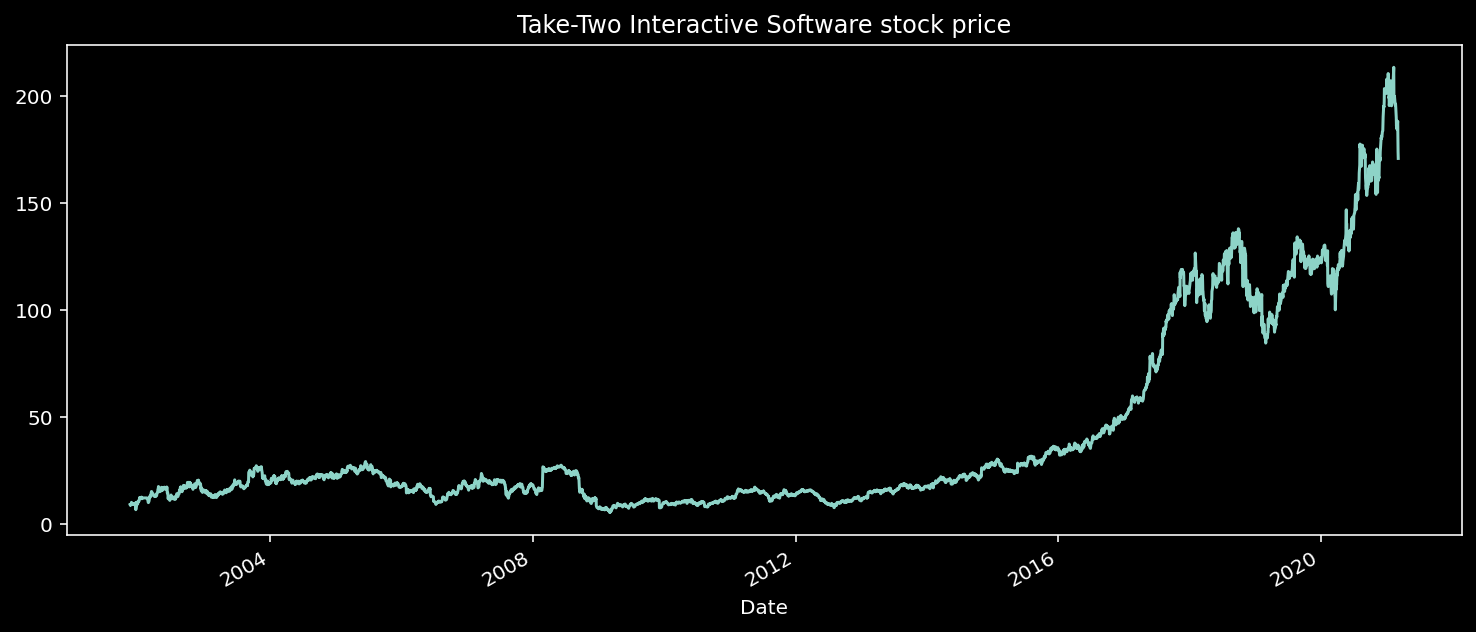

In [7]:
stk_1['Close'].plot(title="Take-Two Interactive Software stock price")
plt.savefig(('Take-Two Interactive Software.png'), dpi=300)

### Stock 2 -  CD Projekt S.A.

Plot Basic Stock Closing Price

In [15]:
stk_2 = get_adjusted_ohlc("7CD.F")

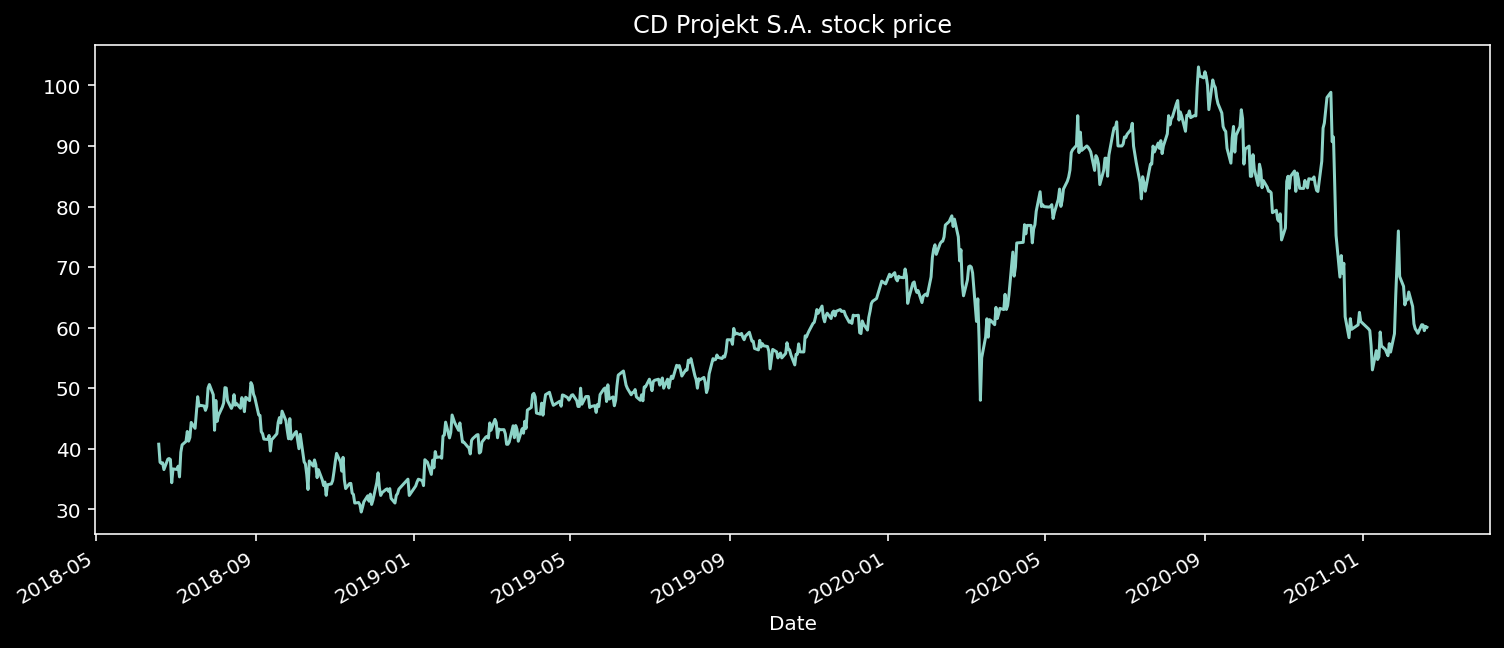

In [16]:
stk_2['Close'].plot(title="CD Projekt S.A. stock price");

### Stock 3 -  GameStop Corp.

Plot Basic Stock Closing Price

In [17]:
stk_3 = get_adjusted_ohlc("GME")

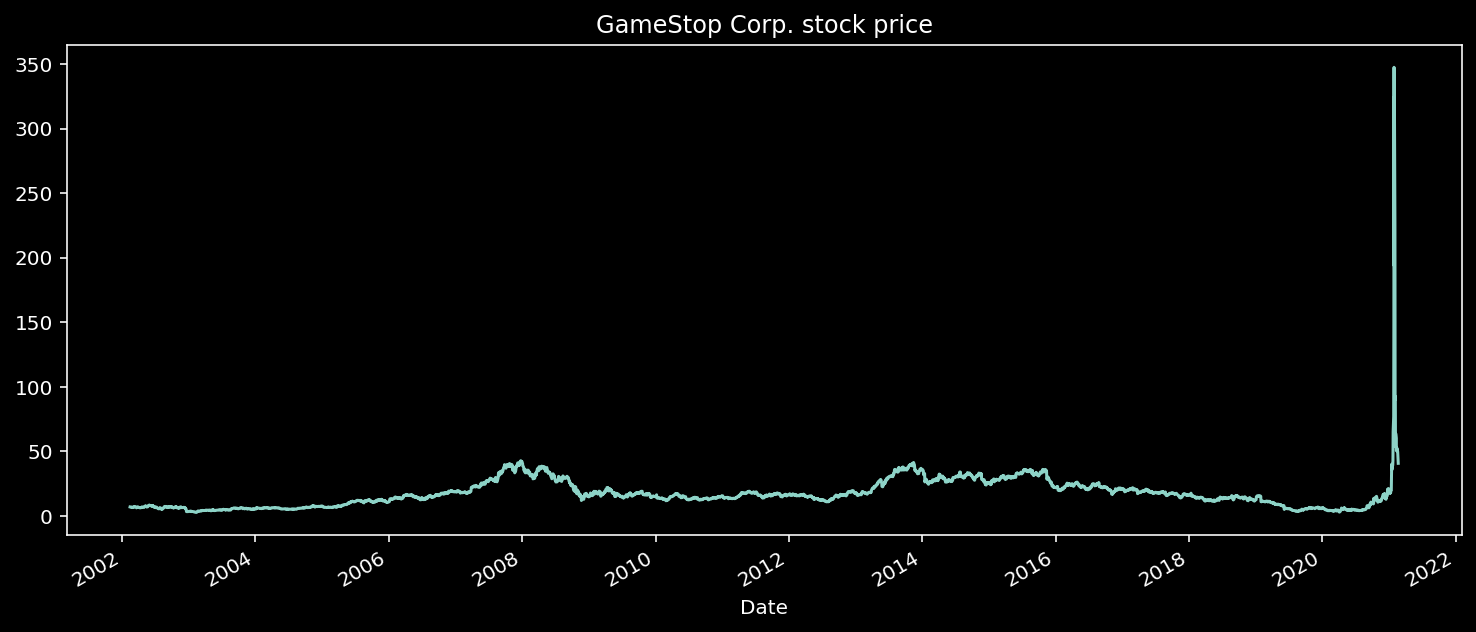

In [18]:
stk_3['Close'].plot(title="GameStop Corp. stock price");

### Stock 4 -  Activision Blizzard, Inc.

Plot Basic Stock Closing Price

In [8]:
stk_4 = get_adjusted_ohlc("ATVI")

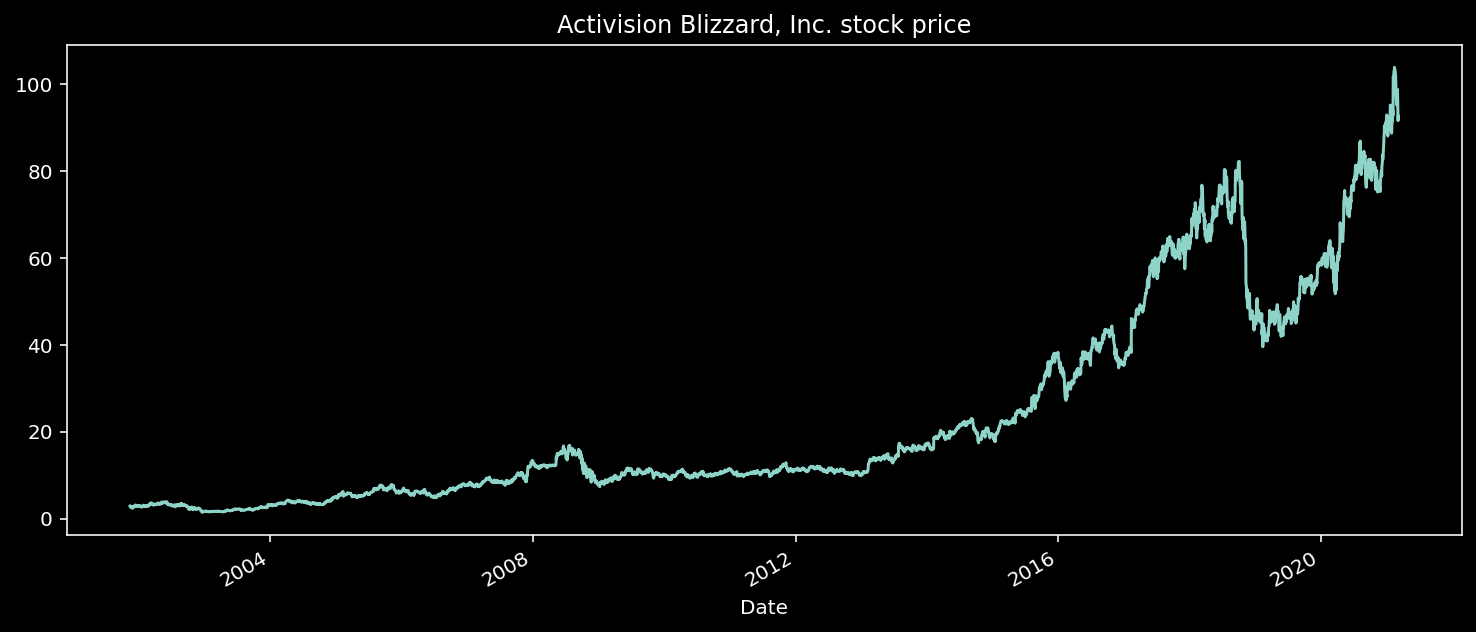

In [9]:
stk_4['Close'].plot(title="Activision Blizzard, Inc. stock price");
#plt.savefig(('Activision Blizzard, Inc..png'), dpi=300)

### Stock 5 - Capcom Co., Ltd.

In [10]:
stk_5 = get_adjusted_ohlc("CCOEY")

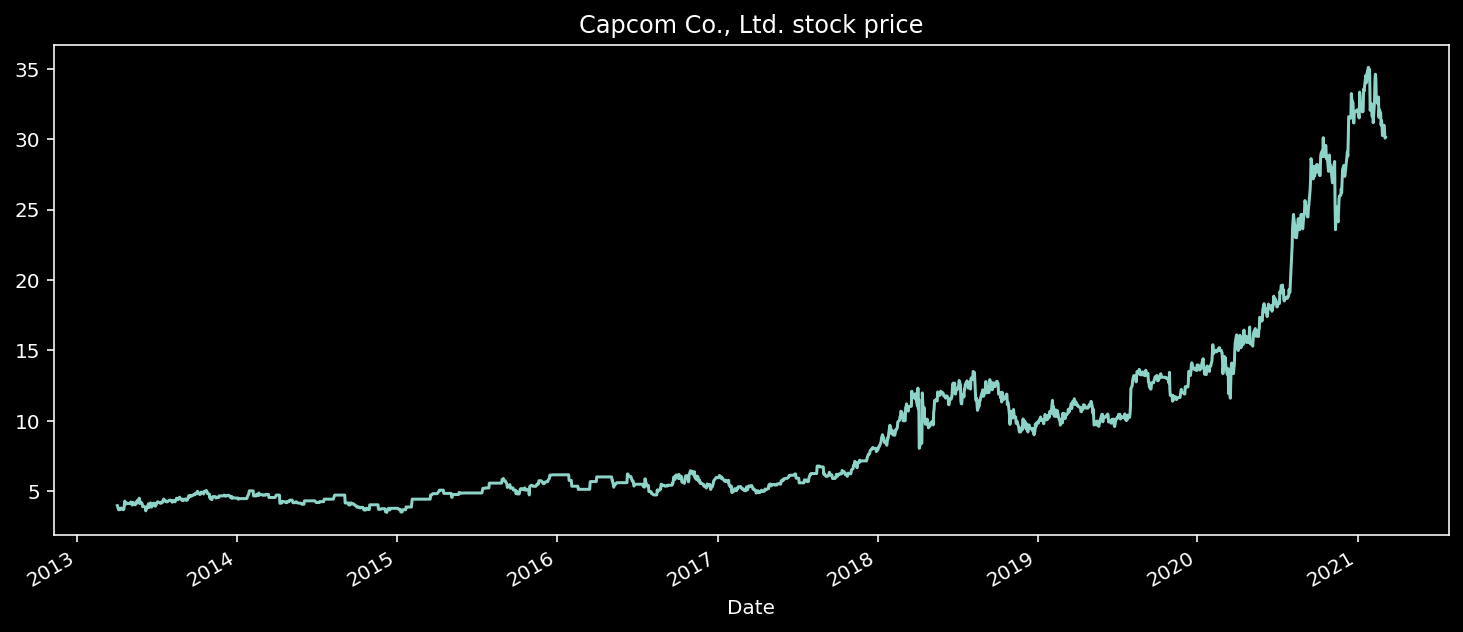

In [11]:
stk_5['Close'].plot(title="Capcom Co., Ltd. stock price");
#plt.savefig(('Capcom Co., Ltd..png'), dpi=300)

### Stock 6 - Tencent Holdings Limited

In [45]:
stk_6 = get_adjusted_ohlc("TCEHY")

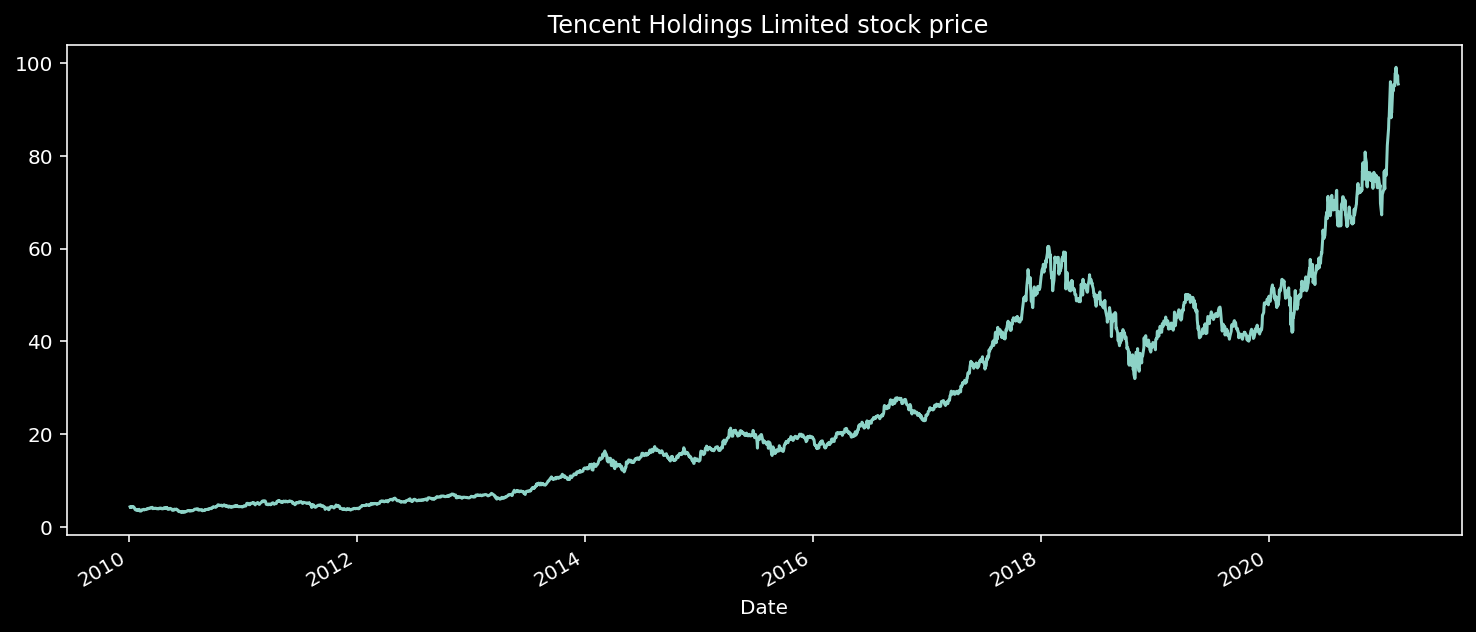

In [46]:
stk_6['Close'].plot(title=" Tencent Holdings Limited stock price");

### Stock 7 - Electronic Arts Inc.

In [12]:
stk_7 = get_adjusted_ohlc("EA")

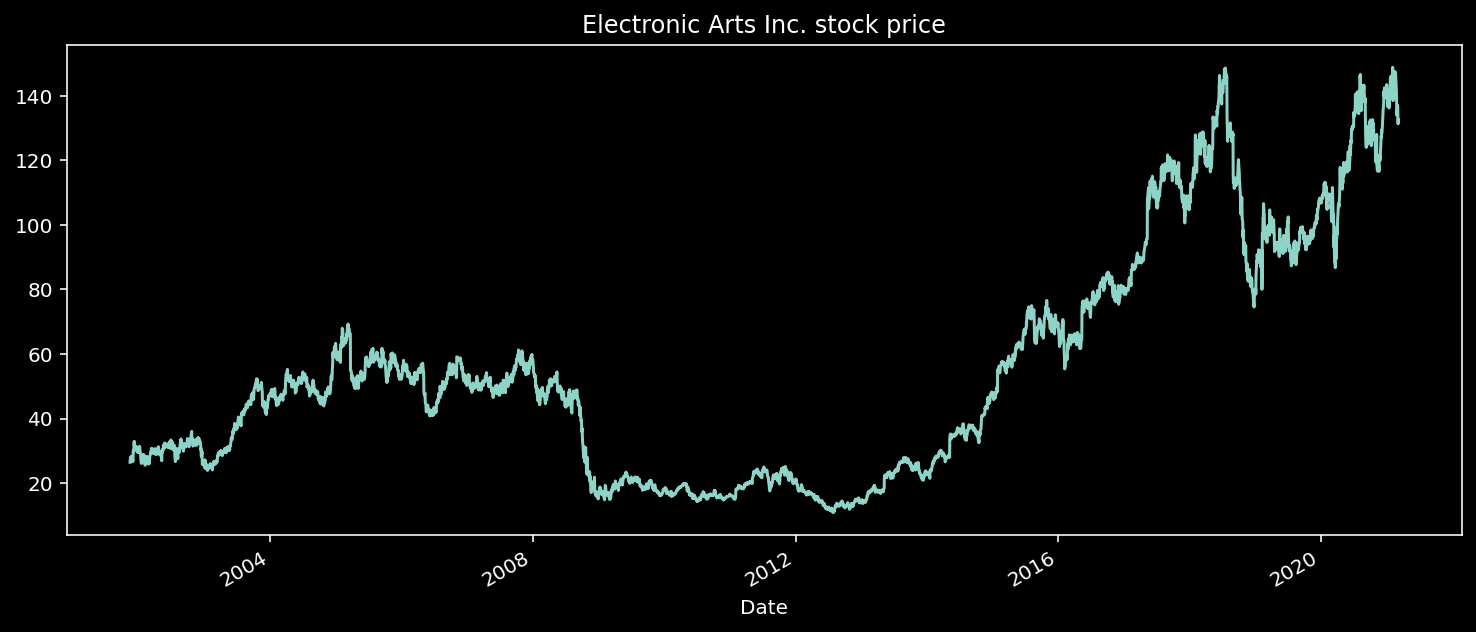

In [13]:
stk_7['Close'].plot(title="Electronic Arts Inc. stock price");
#plt.savefig(('Electronic Arts Inc..png'), dpi=300)

## Saving all Data in a Datastore 
and as singel stock data as an excel file

In [50]:
_portfolio_data = '../data/stock_data/'

In [51]:
def _adjust_stock_data(symbols, hdf_name):
    
    end = pd.datetime.today().date()
    start = end - 252 * BDay() * 20
    
    prices_hdf = pd.HDFStore(_portfolio_data + 'hdf/'+hdf_name+'.h5')
    
    symbol_count = len(symbols)
    N = symbol_count
    missing_symbols = []
    for i, sym in enumerate(symbols, start=1):
        if not pd.isnull(sym):
            try:
                ohlc = get_adjusted_ohlc(sym)
                ohlc.to_excel(_portfolio_data+'xlsx/'+sym+'.xlsx')
                prices_hdf[clean_ticker(sym)] = ohlc
                
            except Exception as e:
                print(e, sym)
                missing_symbols.append(sym)
            N -= 1
            pct_total_left = (N / symbol_count)
            print('{}..[done] | {} of {} symbols collected | {:>.2%}'.format(\
                                                            sym, i, symbol_count, pct_total_left))
    prices_hdf.close()        
    return missing_symbols

In [52]:
symbols = ['TTWO', '7CD.F', 'GME', 'ATVI', 'CCOEY', 'TCEHY', 'EA']

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
_missing = _adjust_stock_data(symbols, "portfolio_one")

TTWO..[done] | 1 of 7 symbols collected | 85.71%
7CD.F..[done] | 2 of 7 symbols collected | 71.43%
GME..[done] | 3 of 7 symbols collected | 57.14%
ATVI..[done] | 4 of 7 symbols collected | 42.86%
CCOEY..[done] | 5 of 7 symbols collected | 28.57%
TCEHY..[done] | 6 of 7 symbols collected | 14.29%
EA..[done] | 7 of 7 symbols collected | 0.00%


check if any symbols are missing

In [55]:
_missing

[]